In [2]:
import pandas as pd

df = pd.read_csv('titanic_train.csv', header=0)
for column in df.columns:
    print(f'Column "{column}" NaN count:', df[column].isna().sum())

Column "PassengerId" NaN count: 0
Column "Survived" NaN count: 0
Column "Pclass" NaN count: 0
Column "Name" NaN count: 0
Column "Sex" NaN count: 0
Column "Age" NaN count: 177
Column "SibSp" NaN count: 0
Column "Parch" NaN count: 0
Column "Ticket" NaN count: 0
Column "Fare" NaN count: 0
Column "Cabin" NaN count: 687
Column "Embarked" NaN count: 2


In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
import numpy as np

df = df.fillna({'Age': df['Age'].mean(),
                'Embarked': 'S'})

df['Age'] = df['Age'].apply(np.ceil)

sex_mapping = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(sex_mapping)

df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,30.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


<AxesSubplot: xlabel='Survived', ylabel='count'>

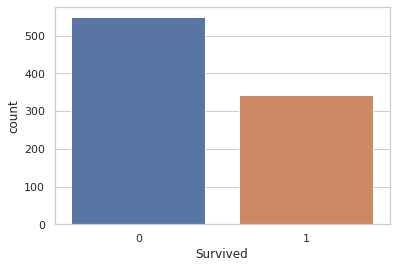

In [5]:
import seaborn as sns

sns.set_theme(style="whitegrid")

sns.countplot(data=df, x='Survived')

[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]


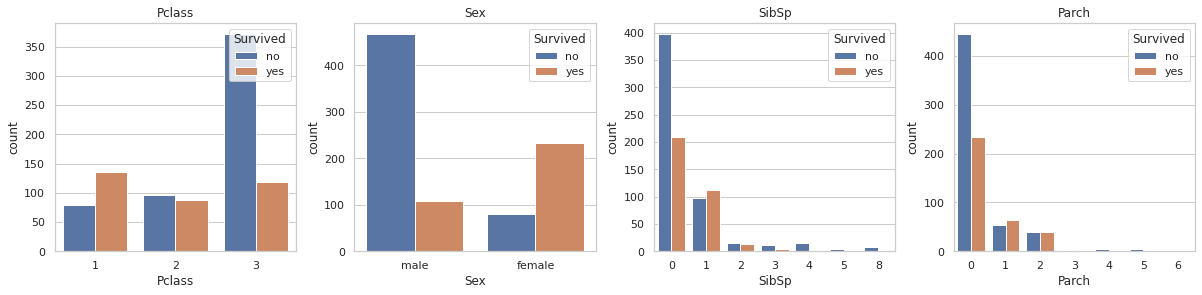

In [18]:
import matplotlib.pyplot as plt

cols_to_visualise = ['Pclass', 'Sex', 'SibSp', 'Parch']
plot_size = 4.2
n_rows = 1 # 2
n_cols = 4 # 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * plot_size, n_rows * plot_size))
for row_idx in range(n_rows):
    for col_idx in range(n_cols):
        i = row_idx * n_cols + col_idx
    
        ax = axs[col_idx]
        # ax = axs[row_idx][col_idx]
        col_name = cols_to_visualise[i]
        series = df[col_name]
        if col_name == 'Sex':
            series = series.map({0: 'male', 1: 'female'})
        sns.countplot(x=series,
                      hue=df['Survived'].map({0: 'no', 1: 'yes'}),
                      ax=ax)
        ax.set_title(col_name)
        ax.legend(title='Survived', loc='upper right')
        
plt.tight_layout()

In [6]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)

PCLASS_FEATURE = 0
SEX_FEATURE = 1
AGE_FEATURE = 2
FARE_FEATURE = 5
SURVIVED = 1
NOT_SURVIVED = 0
MALE = 0
FEMALE = 1

In [7]:
all_dead_score = (sample_count - positive_count) / sample_count
print('Score if y == 0 for every sample:', all_dead_score)

Score if y == 0 for every sample: 0.6161616161616161


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

log_reg_pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(C=10, solver='lbfgs', random_state=1)
)
log_reg_pipe.fit(X_train, y_train)

print('Log reg train score:', log_reg_pipe.score(X_train, y_train))
print('Log reg test score:', log_reg_pipe.score(X_test, y_test))

Log reg train score: 0.8023952095808383
Log reg test score: 0.7802690582959642


In [11]:
from sklearn.model_selection import GridSearchCV

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'logisticregression__C': param_range}]
grid_search = GridSearchCV(
    estimator=log_reg_pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    refit=True,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print('best_score:', grid_search.best_score_)
print('best_params:', grid_search.best_params_)

best_score: 0.8024197195838987
best_params: {'logisticregression__C': 100.0}


In [12]:
from sklearn.svm import SVC

svm_pipe = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', gamma=100, C=1, random_state=1)
)
svm_pipe.fit(X_train, y_train)

print('Rbf svm train score:', svm_pipe.score(X_train, y_train))
print('Rbf svm test score:', svm_pipe.score(X_test, y_test))

Rbf svm train score: 0.938622754491018
Rbf svm test score: 0.6547085201793722


In [13]:
param_grid = [{'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]
grid_search = GridSearchCV(
    estimator=svm_pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    refit=True,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print('best_score:', grid_search.best_score_)
print('best_params:', grid_search.best_params_)

best_score: 0.8248077792853913
best_params: {'svc__C': 1.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [14]:
svm_pipe = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', gamma=0.1, C=1.0, random_state=1)
)
svm_pipe.fit(X_train, y_train)

print('SVM Train score after grid search:', svm_pipe.score(X_train, y_train))
print('SVM Test score after grid search:', svm_pipe.score(X_test, y_test))

SVM Train score after grid search: 0.8323353293413174
SVM Test score after grid search: 0.8295964125560538


In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)

cov_mat = np.cov(X_train_std.T)
cov_mat

array([[ 1.00149925, -0.12239985, -0.27981562,  0.08252871,  0.00131059,
        -0.55786659],
       [-0.12239985,  1.00149925, -0.06901077,  0.10303674,  0.22615707,
         0.14514179],
       [-0.27981562, -0.06901077,  1.00149925, -0.22810599, -0.19009735,
         0.07785674],
       [ 0.08252871,  0.10303674, -0.22810599,  1.00149925,  0.39812088,
         0.1781164 ],
       [ 0.00131059,  0.22615707, -0.19009735,  0.39812088,  1.00149925,
         0.26063427],
       [-0.55786659,  0.14514179,  0.07785674,  0.1781164 ,  0.26063427,
         1.00149925]])

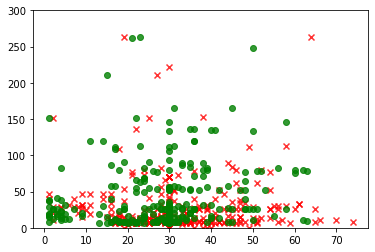

In [16]:
def show_2d_scatter(X, y, pos_label, neg_label, x_feature_idx, y_feature_idx, ylim=None):
    plt.scatter(x=X[y == neg_label, x_feature_idx],
                y=X[y == neg_label, y_feature_idx],
                alpha=0.8,
                c='red',
                marker='x')
    plt.scatter(x=X[y == pos_label, x_feature_idx],
                y=X[y == pos_label, y_feature_idx],
                alpha=0.8,
                c='green',
                marker='o')
    if ylim:
        plt.ylim(0, ylim)
    plt.show()


show_2d_scatter(X_train, y_train, SURVIVED, NOT_SURVIVED, AGE_FEATURE, FARE_FEATURE, ylim=300)

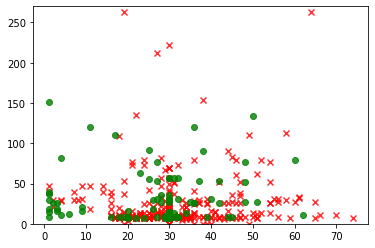

In [17]:
X_train_men = X_train[X_train[:, SEX_FEATURE] == MALE]
y_train_men = y_train[X_train[:, SEX_FEATURE] == MALE]
show_2d_scatter(X_train_men, y_train_men, SURVIVED, NOT_SURVIVED, AGE_FEATURE, FARE_FEATURE, ylim=270)

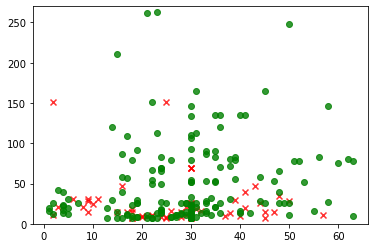

In [18]:
X_train_women = X_train[X_train[:, SEX_FEATURE] == FEMALE]
y_train_women = y_train[X_train[:, SEX_FEATURE] == FEMALE]
show_2d_scatter(X_train_women, y_train_women, SURVIVED, NOT_SURVIVED, AGE_FEATURE, FARE_FEATURE, ylim=270)

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', 
                                n_estimators=25,
                                random_state=1)
forest.fit(X_train, y_train)
print('Random forest train score:', forest.score(X_train, y_train))
print('Random forest test score:', forest.score(X_test, y_test))

Random forest train score: 0.9760479041916168
Random forest test score: 0.8026905829596412


In [20]:
param_grid = [
    {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'criterion': ['gini', 'entropy']}
]
grid_search = GridSearchCV(
    estimator=forest,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    refit=True,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print('best_score:', grid_search.best_score_)
print('best_params:', grid_search.best_params_)

best_score: 0.8293758480325645
best_params: {'criterion': 'gini', 'n_estimators': 30}


In [21]:
forest = RandomForestClassifier(criterion='gini', 
                                n_estimators=30,
                                random_state=1)
forest.fit(X_train, y_train)
print('Random forest train score:', forest.score(X_train, y_train))
print('Random forest test score:', forest.score(X_test, y_test))
print('Random forest test predict:', forest.predict(X_test))

Random forest train score: 0.9775449101796407
Random forest test score: 0.7982062780269058
Random forest test predict: [0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1
 1]
